<a href="https://colab.research.google.com/github/harrysharma/Ted_talk_view_prediction/blob/main/Hari_TED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',500)
pd.plotting.register_matplotlib_converters()
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import ast
import calendar

from wordcloud import WordCloud,ImageColorGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
filepath='/content/drive/MyDrive/AlmaBetter/Capston Project 3 Ted Talk Analysis/Code/Data/data_ted_talks.csv'

In [ ]:
dataset=pd.read_csv(filepath)

In [ ]:
dataset.shape

(4005, 19)

In [ ]:
dataset.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
dataset.info()        #comments,about_speakers, occupations, all_speakers, has null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
dataset.isnull().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [ ]:
dataset.describe(percentiles = [.25,.50,.75,.95,.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,52465.80,60751.60,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,6182301.40,16299833.68,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,531.65,1038.73,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,1230.80,1601.12,3922.0


In [ ]:
dataset.describe(include='object')

,title,speaker_1,all_speakers,occupations,about_speakers,recorded_date,published_date,event,native_lang,available_lang,topics,related_talks,url,description,transcript
count,4005,4005,4001,3483,3502,4004,4005,4005,4005,4005,4005,4005,4005,4005,4005
unique,4005,3274,3306,2049,2977,1334,2962,459,12,3902,3977,4005,4005,4005,4005
top,A university for the coming singularity,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,2017-04-24,2017-09-07,TED-Ed,en,['en'],"['TED-Ed', 'math']",{1491: 'How Arduino is open-sourcing imaginati...,https://www.ted.com/talks/tristan_harris_how_a...,The way we rate national economies is all wron...,Whitney Pennington Rodgers: Hello and welcome ...
freq,1,34,34,53,10,97,27,556,3957,24,8,1,1,1,1


In [ ]:
df=dataset.copy()

In [ ]:
df['published_date']=pd.to_datetime(df['published_date'],format='%Y-%m-%d')
df['recorded_date']=pd.to_datetime(df['recorded_date'],format='%Y-%m-%d')

In [ ]:

df['month'] = pd.DatetimeIndex(df['published_date']).month
df['month'] = df['month'].apply(lambda x: calendar.month_abbr[x])
df['year'] = pd.DatetimeIndex(df['published_date']).year
df['day'] = pd.DatetimeIndex(df['published_date']).day

last_publishing_date = df['published_date'].max()
df['time_after_published']=last_publishing_date - pd.DatetimeIndex(df['published_date'])
df['days_to_publish']=df['published_date'] - df['recorded_date']
df['time_after_published'] = pd.to_numeric(df['time_after_published'].dt.days, downcast='integer')
df['days_to_publish'] = pd.to_numeric(df['days_to_publish'].dt.days, downcast='integer')


In [ ]:
#Replace  nan all_speakers by speaker_1
df['all_speakers'].fillna(str({0:[str(df['speaker_1'])]}),inplace=True,axis=0)
df['all_speakers']= df['all_speakers'].apply(lambda x: [val for val in ast.literal_eval(x).values() ] )

In [ ]:
df['sp_len']=df['all_speakers'].apply(lambda x: len(x))

In [ ]:
df['occupations'].fillna(str({0:['other']}),inplace=True,axis=0)
df['occupations']=df['occupations'].apply(lambda x:[val for val in ast.literal_eval(x).values() ])

In [ ]:
df['sp_len']=df['all_speakers'].apply(lambda x:len(x))
df['occ_len']=df['occupations'].apply(lambda x:len(x))
df['occupations']=df.apply(lambda x:( x['occupations'] if x['sp_len']==x['occ_len'] else x['occupations']*x['sp_len']),axis=1)
df.drop(['sp_len','occ_len'],inplace=True,axis=1)

In [ ]:
df.drop(index=[3389],axis=0,inplace=True)   #data about speaker in japnese

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'month', 'year',
       'day', 'time_after_published', 'days_to_publish'],
      dtype='object')

In [ ]:
df=df.set_index(['talk_id', 'title', 'speaker_1',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'month', 'year',
       'day', 'time_after_published', 'days_to_publish']).apply(pd.Series.explode).reset_index()

In [ ]:
dataset['about_speakers'].fillna('',inplace=True,axis=0)

#EDA

##Speaker_1

###Speaker1 vs views

In [ ]:
#top 25 speakers
temp=df.groupby(['speaker_1'],as_index=False)['views'].sum().sort_values('views',ascending=False)[:25]


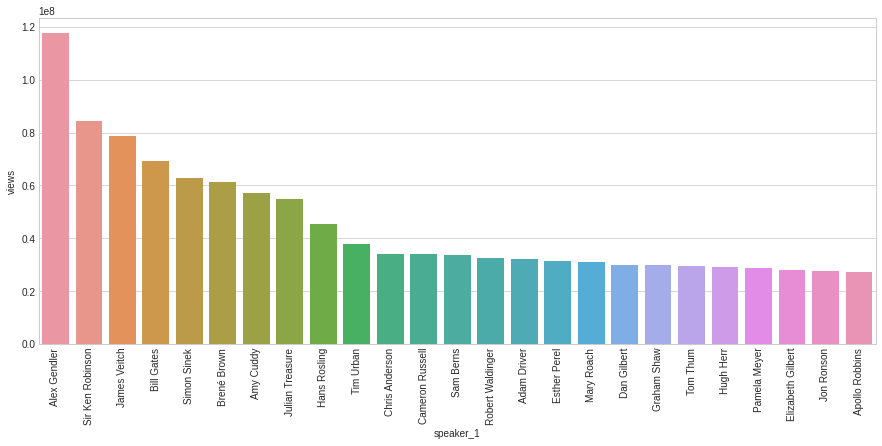

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=90);


In [ ]:
speaker_count = df['speaker_1'].value_counts().to_frame()
df_speaker_count = pd.DataFrame(speaker_count)
df_speaker_count = df_speaker_count.reset_index()
df_speaker_count.columns = ['Speaker_name', 'talks_delivered']

In [ ]:
most_talks = df_speaker_count.nlargest(100, 'talks_delivered')


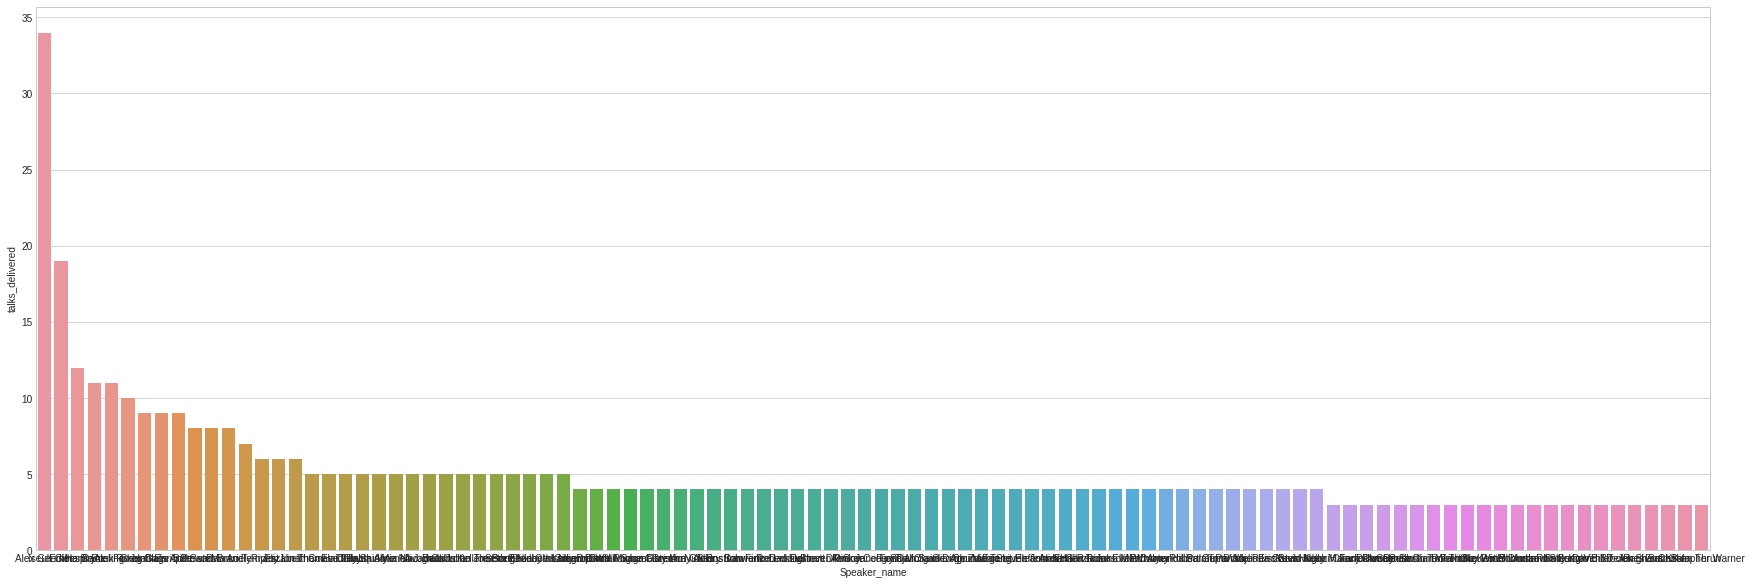

In [ ]:
plt.figure(figsize=(30,10))
sns.barplot(x = 'Speaker_name', y = 'talks_delivered', data = most_talks)

Total views for each author is not dependent on the number of total talks he delivered.

###Speaker_1 vs comments

In [ ]:
temp=df.groupby(['speaker_1'],as_index=False)['comments'].sum().sort_values('comments',ascending=False)[:25]


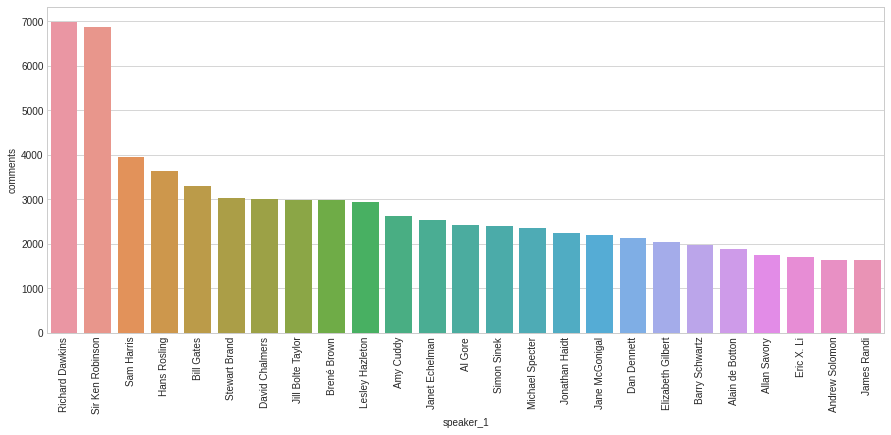

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='comments',data=temp);
plt.setp(ax.get_xticklabels(), rotation=90);

###Speaker_1 vs duration

In [ ]:
temp=df.groupby(['speaker_1'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:25]


In [ ]:
#  Addd plot for avg. talk duration for each speaker

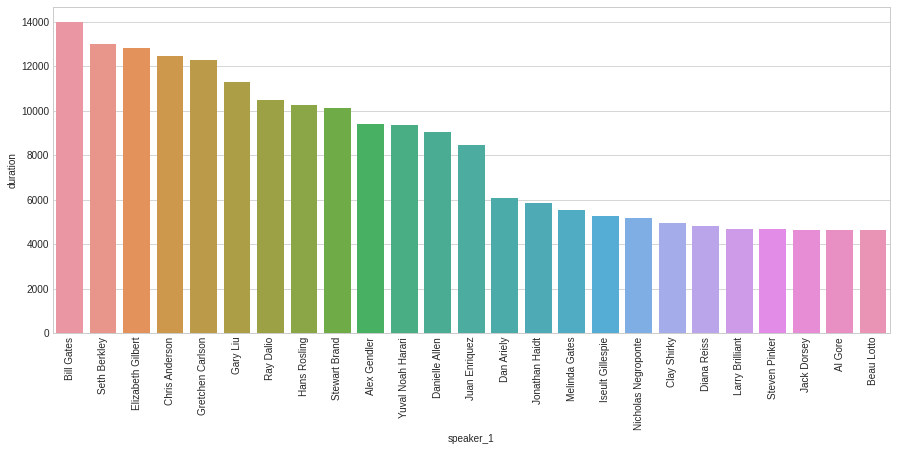

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=90);

In [ ]:
temp=df.groupby(['month'],as_index=False)['views'].sum().sort_values('views',ascending=False)[:25]

In [ ]:
temp=df.groupby(['year'],as_index=False)['views'].sum().sort_values('views',ascending=False)[:25]

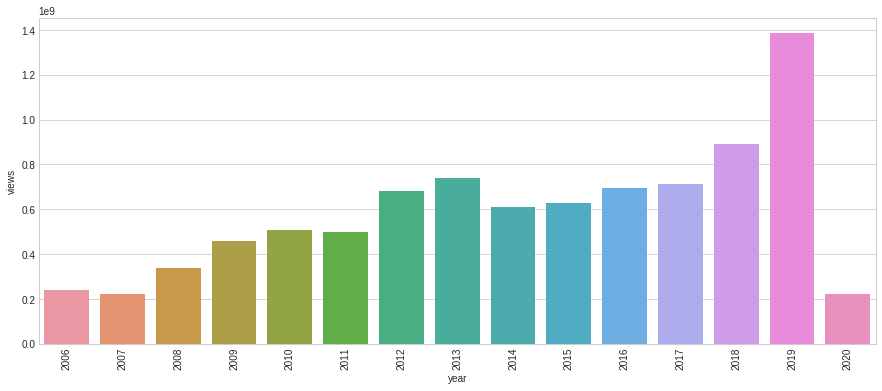

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='year',y='views',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=90);

In [ ]:
temp=df.groupby(['event','year'],as_index=False)['views'].sum().sort_values('views',ascending=False).reset_index()[:25]
temp

,index,event,year,views
0,72,TED-Ed,2019,799491903
1,124,TED2014,2014,245770481
2,126,TED2015,2015,242261768
3,129,TED2016,2016,227145078
4,122,TED2013,2013,222427017
5,131,TED2017,2017,217177677
6,134,TED2018,2018,203205450
7,112,TED2009,2009,201000818
8,119,TED2012,2012,191768667
9,117,TED2011,2011,174444466


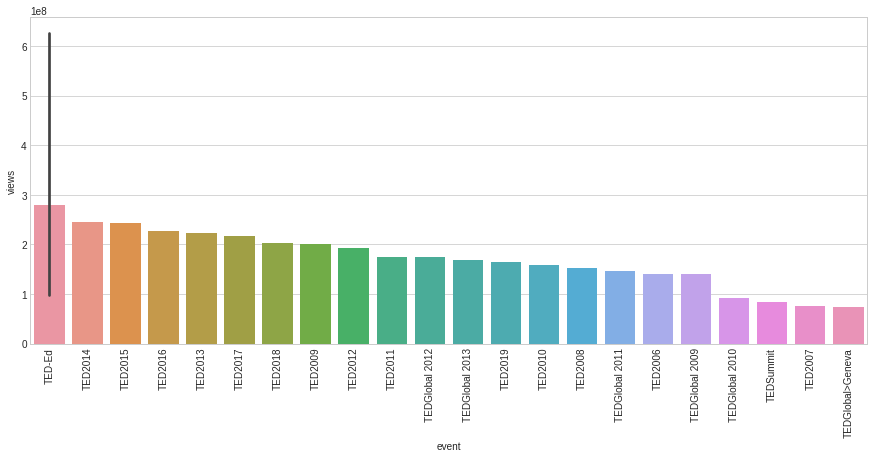

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='event',y='views',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=90);

In [ ]:
# avg views of each event plot 

In [ ]:
df[df['event']=='TED-Ed']['year'].value_counts()

2019    355
2020     91
2018     81
2017     27
2012      8
Name: year, dtype: int64

In [ ]:
# top 25 speakers
temp=df[['occupations','views']]
temp=df.explode('occupations')
temp
# temp=df.astype({'occupations':'str'})

,talk_id,title,speaker_1,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,month,year,day,time_after_published,days_to_publish,all_speakers,occupations
0,1,Averting the climate crisis,Al Gore,{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Jun,2006,27,5056,122.0,Al Gore,climate advocate
1,92,The best stats you've ever seen,Hans Rosling,"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Jun,2006,27,5056,125.0,Hans Rosling,global health expert; data visionary
2,7,Simplicity sells,David Pogue,{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Jun,2006,27,5056,123.0,David Pogue,technology columnist
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,Jun,2006,27,5056,121.0,Majora Carter,activist for environmental justice
4,66,Do schools kill creativity?,Sir Ken Robinson,"{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,Jun,2006,27,5056,122.0,Sir Ken Robinson,author
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,62678,"Crisis support for the world, one text away",Nancy Lublin,"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",Apr,2020,27,3,5.0,Nancy Lublin,health activist
4135,62782,The dark history of IQ tests,Stefan C Dombrowski,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",Apr,2020,27,3,0.0,Stefan C Dombrowski,other
4136,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II studies cutting edge...,464414,2019-06

In [ ]:
temp=temp.groupby(['occupations'],as_index=False)['views'].sum().sort_values('views',ascending=False).reset_index()[:25]
temp

,index,occupations,views
0,1191,other,1088529930
1,125,author,499452277
2,1777,writer,410448475
3,573,educator,234031347
4,601,entrepreneur,208354770
5,12,activist,208108827
6,1360,psychologist,184260293
7,914,journalist,179942939
8,1137,neuroscientist,133974359
9,93,artist,126745454


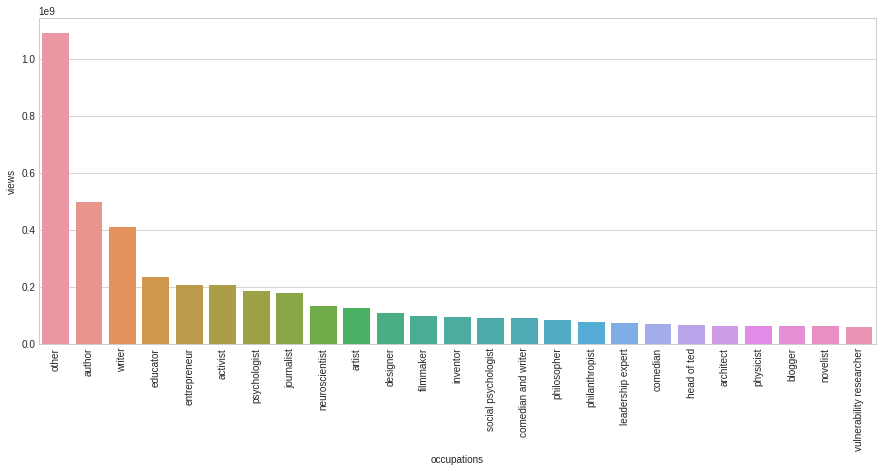

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='occupations',y='views',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=90);

In [ ]:
df[df['occupations']!='other']

,talk_id,title,speaker_1,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,month,year,day,time_after_published,days_to_publish,all_speakers,occupations
0,1,Averting the climate crisis,Al Gore,{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Jun,2006,27,5056,122.0,Al Gore,[climate advocate]
1,92,The best stats you've ever seen,Hans Rosling,"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Jun,2006,27,5056,125.0,Hans Rosling,[global health expert; data visionary]
2,7,Simplicity sells,David Pogue,{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Jun,2006,27,5056,123.0,David Pogue,[technology columnist]
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,Jun,2006,27,5056,121.0,Majora Carter,[activist for environmental justice]
4,66,Do schools kill creativity?,Sir Ken Robinson,"{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,Jun,2006,27,5056,122.0,Sir Ken Robinson,"[author, educator]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,62678,"Crisis support for the world, one text away",Nancy Lublin,"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,en,['en'],6.0,690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,https://www.ted.com/talks/nancy_lublin_crisis_...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",Apr,2020,27,3,5.0,Nancy Lublin,[health activist]
4135,62782,The dark history of IQ tests,Stefan C Dombrowski,NaN,307187,2020-04-27,2020-04-27,TED-Ed,en,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,https://www.ted.com/talks/stefan_c_dombrowski_...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",Apr,2020,27,3,0.0,Stefan C Dombrowski,[other]
4136,62263,"How ""policing for profit"" undermines your rights",Dick M. Carpenter II,{0: 'Dick M. Carpenter II studies cutt

In [ ]:
# temp=df[dataset['occupations']!='[other]']

# final_text = " ".join(topic for topic in temp['occupations'].astype(str))

# wordcloud = WordCloud(background_color="white", width=1000, height=600).generate(final_text)

# plt.axis("off")
# # plt.rcParams["figure.figsize"] = (25,10)
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.show()

In [ ]:
temp=df[['native_lang','views']]
temp=temp.groupby(['native_lang'],as_index=False)['views'].sum().sort_values('views',ascending=False).reset_index()


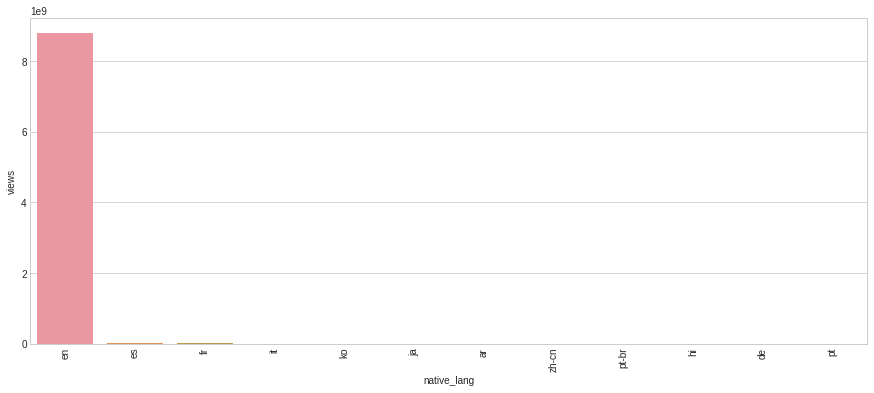

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='native_lang',y='views',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=90);

In [ ]:
df['available_lang']=df['available_lang'].apply(ast.literal_eval)

ValueError: ignored

In [ ]:
temp=df[['available_lang','views']]
temp2=temp.explode('available_lang')

In [ ]:
temp3=temp2.groupby(['available_lang'],as_index=False).agg({'views':[np.mean,np.median,'count']}).sort_values([('views','mean')],ascending=False).reset_index()[:50]
temp3.round(2)

index available_lang        views                  
                                mean      median count
0     46            inh  65051954.00  65051954.0     1
1     63            mfe  33322423.00  33322423.0     2
2     59             lo  27689425.33   9316886.0     3
3     70             mt  16455709.00  16455709.0     2
4    103            tlh  12954031.00  12954031.0     1
5     96            szl   9611982.33   8699436.0     3
6     16            cnh   8699436.00   8699436.0     1
7     53             kn   8638500.41   2664069.0    17
8    109             uz   7676978.43   3029410.0    83
9     75             nn   7333974.83   2403900.5    12
10    47             is   6220770.24   3221499.0    17
11    73             ne   6215929.61   2808210.0    44
12     8             be   6201771.43   2691198.0   122
13    29            fil   6076746.12   2039084.0    50
14   105             tt   5987951.50   3083752.5     6
15    67             mn   5874223.18   3029410.0   273
16     1             af   5802283.61   2194901.0    31
17    61            ltg   5700570.67   3666561.0     3
18     7             az   5531940.85   2632426.5   118
19    25             et   5505455.29   2603054.0   199
20   101             tk   5371332.00   5371332.0     2
21    50             ka   5179614.56   2724137.0   232
22    68             mr   5005209.36   2182056.5   240
23   106             ug   4995892.33   3542566.0    24
24    12             bo   4983781.43   1609949.5    14
25    86             sh   4931071.13   1615139.0    15
26    11             bn   4926310.54   2051157.0   121
27    28             fi   4876610.77   2367529.0   374
28    51             kk   4623350.55   2330332.0   127
29    99             tg   4551660.91   4141345.0    11
30    52             km   4544995.85   4326521.0    13
31    69             ms   4502265.32   2614196.0   138
32    62             lv   4489618.27   1892508.0   587
33    26             eu   4474646.12   2195150.5    96
34    65             mk   4462100.25   2013963.5   396
35    23             eo   4423648.87   2221087.0   119
36    97             ta   4406718.65   1738412.0   133
37    89             sl   4348732.84   1994673.0   469
38    72             nb   4248324.39   1933784.0   293
39    93            srp   4199778.12   2314973.0    33
40    20             dz   4190895.00   4190895.0     1
41    18             da   4117176.31   1853389.0   643
42    64             mg   4110572.00   1339769.0     6
43    84             ry   4109646.00   4109646.0     1
44    98             te   4081673.68   1829036.0    71
45    34             gl   4057951.65   1888957.5   328
46    85             sc   4033320.00   1726387.0     3
47    45             ig   4023958.67   2311389.0     3
48     2             am   3993141.64   2699052.0    14
49   108             ur   3960802.34   1797841.0   191

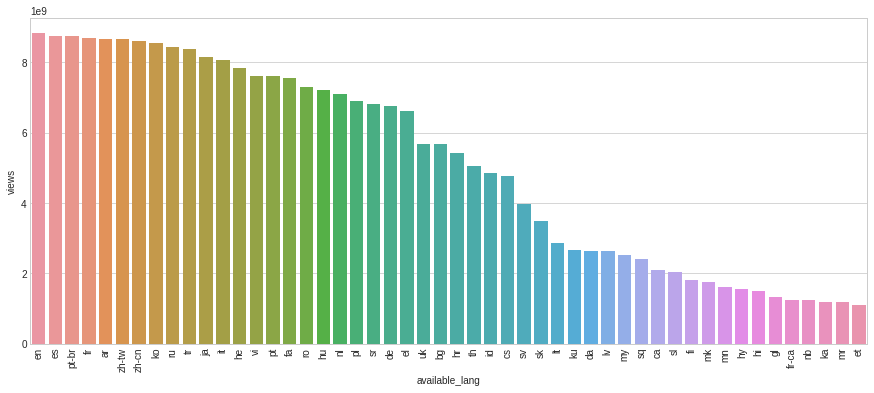

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='available_lang',y='views',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=90);

In [ ]:

df.head(5)

,talk_id,title,speaker_1,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,month,year,day,time_after_published,days_to_publish,all_speakers,occupations
0,1,Averting the climate crisis,Al Gore,{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Jun,2006,27,5056,122.0,Al Gore,[climate advocate]
1,92,The best stats you've ever seen,Hans Rosling,"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Jun,2006,27,5056,125.0,Hans Rosling,[global health expert; data visionary]
2,7,Simplicity sells,David Pogue,{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"[ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Jun,2006,27,5056,123.0,David Pogue,[technology columnist]
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"[ar, bg, bn, ca, cs, de, en, es, fa, fi, fr, h...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,Jun,2006,27,5056,121.0,Majora Carter,[activist for environmental justice]
4,66,Do schools kill creativity?,Sir Ken Robinson,"{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"[af, ar, az, be, bg, bn, ca, cs, da, de, el, e...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,Jun,2006,27,5056,122.0,Sir Ken Robinson,"[author, educator]"


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


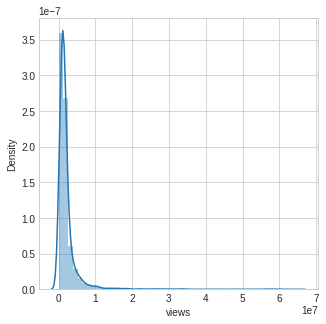

In [ ]:
plt.figure(figsize=(5,5))

sns.distplot(df['views'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


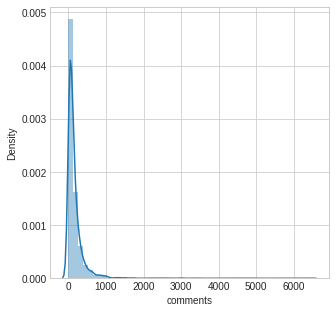

In [ ]:
plt.figure(figsize=(5,5))

sns.distplot(df['comments'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


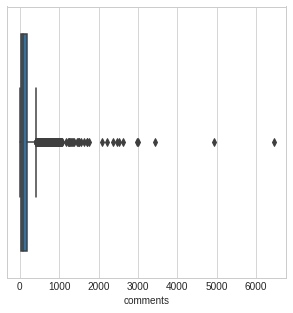

In [ ]:
plt.figure(figsize=(5,5))

sns.boxplot('comments',data=df)

In [ ]:
def count_outlier(x):
  Q1 = df[x].quantile(0.25)
  Q2 = df[x].quantile(0.50)
  Q3 = df[x].quantile(0.75)
  IQR = Q3 - Q1
  total_outlier_num = ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum()
  return total_outlier_num

In [ ]:
count_outlier('comments')

266

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


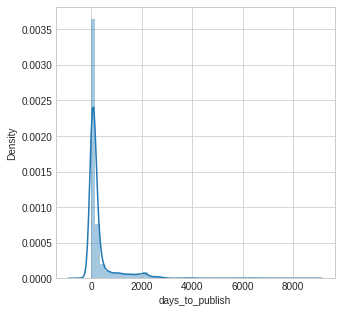

In [ ]:
plt.figure(figsize=(5,5))

sns.distplot(df['days_to_publish'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


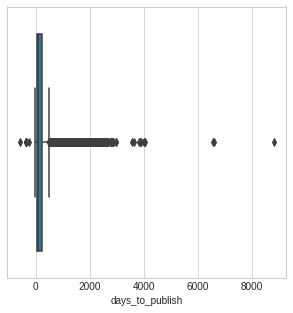

In [ ]:
plt.figure(figsize=(5,5))

sns.boxplot('days_to_publish',data=df)

In [ ]:
count_outlier('days_to_publish')

586

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


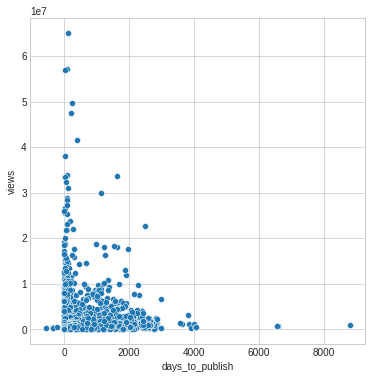

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot('days_to_publish','views',data=df)

View exponentialy decrease with days to publish

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


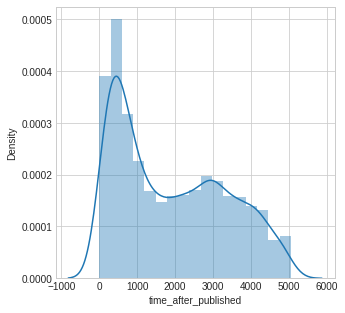

In [ ]:
plt.figure(figsize=(5,5))

sns.distplot(df['time_after_published'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


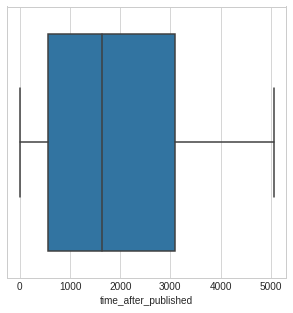

In [ ]:
plt.figure(figsize=(5,5))

sns.boxplot('time_after_published',data=df)

In [ ]:
count_outlier('time_after_published')

0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


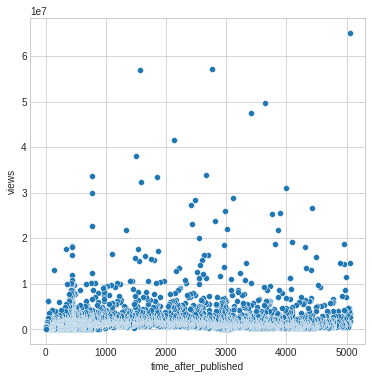

In [ ]:
plt.figure(figsize=(6,6))
sns.scatterplot('time_after_published','views',data=df)

In [ ]:
df.head()

,talk_id,title,speaker_1,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,month,year,day,time_after_published,days_to_publish,all_speakers,occupations
0,1,Averting the climate crisis,Al Gore,{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"[ar, bg, cs, de, el, en, es, fa, fr, fr-ca, gl...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Jun,2006,27,5056,122.0,Al Gore,[climate advocate]
1,92,The best stats you've ever seen,Hans Rosling,"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"[ar, az, bg, bn, bs, cs, da, de, el, en, es, e...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",Jun,2006,27,5056,125.0,Hans Rosling,[global health expert; data visionary]
2,7,Simplicity sells,David Pogue,{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"[ar, bg, de, el, en, es, fa, fr, he, hr, hu, i...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Jun,2006,27,5056,123.0,David Pogue,[technology columnist]
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"[ar, bg, bn, ca, cs, de, en, es, fa, fi, fr, h...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,Jun,2006,27,5056,121.0,Majora Carter,[activist for environmental justice]
4,66,Do schools kill creativity?,Sir Ken Robinson,"{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"[af, ar, az, be, bg, bn, ca, cs, da, de, el, e...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,Jun,2006,27,5056,122.0,Sir Ken Robinson,"[author, educator]"


In [ ]:
numeric_feat=set(df.describe().columns) - {'talk_id'}

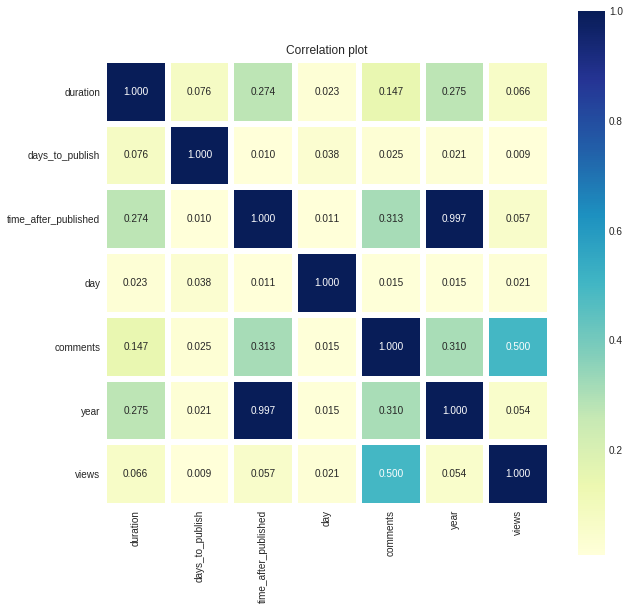

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(df[numeric_feat].corr().abs(),linewidths=5, annot=True, 
            square=True,annot_kws={'size': 10},cmap='YlGnBu', fmt=".3f") #cmap = 'Blues'